<a href="https://colab.research.google.com/github/mxn170019/Topic_Modeling_Quora_questions/blob/master/Top_Modeling_Latent_Deirichlet_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Dirichlet Allocation

## Data

We will be using articles from NPR (National Public Radio), obtained from their website [www.npr.org](http://www.npr.org)

In [0]:
import pandas as pd

In [0]:
npr = pd.read_csv('/content/npr.csv')

In [0]:
npr.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [0]:
npr['Article'][0]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this administration’s ineffective foreign policy that has left America weaker in the eyes of the world.” Other GOP leaders sounded much the same theme. ”[We have] been urging President Obama for years to take strong action to deter Russia’s worldwide aggression, including its   operations,” wrote Rep. Devin Nunes,  . chairman of the House Intelligence Committee. ”Now with just a few weeks left in office, the president has suddenly decided that some stronger measures are indeed warranted.” Appearing 

Notice how we don't have the topic of the articles! Let's use LDA to attempt to figure out clusters of the articles.

## Preprocessing

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [0]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

#Discard words that shows up in 95% of all documents
# Discard words that show minimum in 2 document
# Automatically remove the stop words.

In [0]:
dtm = cv.fit_transform(npr['Article'])
# Document term metrics

In [0]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [0]:
# 11992 Documents X  54777 words

## LDA

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

In [0]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
# The remaining are three steps
# 1) Grab the vocabulary of wrords 
# 2) Grab the topic
# 3) Grab the highest probability words per topic


## Showing Stored Words

In [0]:
# 1) Grab the vocabulary of wrords 

In [0]:
len(cv.get_feature_names())

54777

In [0]:
#  That means get_feature_names is holding an instence of all words

In [0]:
type(cv.get_feature_names())

list

In [0]:
import random

In [0]:
# This is a method to grap a word from the list
import random
random_word_id = random.randint(0,54777)
cv.get_feature_names()[random_word_id]

'kelly'

In [0]:
random_word_id

27038

In [0]:
for i in range(20):
    random_word_id = random.randint(0,54776)
    print(cv.get_feature_names()[random_word_id])

relaying
lockup
steadily
valuables
bitch
alda
tanto
credits
format
composure
championships
shay
subway
espys
michigan
baptized
beige
honour
inch
cruises


### Showing Top Words Per Topic

In [0]:
len(LDA.components_)

7

In [0]:
type(LDA.components_)

numpy.ndarray

In [0]:
LDA.components_.shape

(7, 54777)

In [0]:
## And that is 7 topics with 54777 each 

In [0]:
LDA.components_[0][54776]

0.14286162609098174

In [0]:
len(LDA.components_[0])

54777

In [0]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]])

In [0]:
# Grab the highest probability words per topic
# now we need to compbine the array  ( LDA.components_) with the ability to grab vocabulery ( cv.get_feature_names()) in order to show-
# the highest probability words per topic


In [0]:
LDA.components_[0].shape

(54777,)

In [0]:
 # the first topic
single_topic = LDA.components_[0]   

In [0]:
# Word least representative of this topic
single_topic[18302]

0.14285714309286987

In [0]:
# Word most representative of this topic
single_topic[42993]

6247.245510521078

In [0]:
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993])

In [0]:
####### understanding single_topic.argsort


In [0]:
import numpy as np

In [0]:
arr = np.array([10,200,1])

In [0]:
arr.argsort()

array([2, 0, 1])

In [0]:
######## ---------------------

In [0]:
# Top 10 words for this topic:
# The index of high probability words in that single topic
single_topic.argsort()[-10:]

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993])

In [0]:
top_word_indices = single_topic.argsort()[-10:]  # Grap the last 10 values of .argsort

## ARGSORT --> Index positions sorted from least --> Greatest 
## Top 10 vlues ( 10 greatest values )
## Last 10 values of ARGSORT ()

In [0]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

new
percent
government
company
million
care
people
health
said
says


These look like business articles perhaps... Let's confirm by using .transform() on our vectorized articles to attach a label number. But first, let's view all the 10 topics found.

In [0]:
top_word_indices = single_topic.argsort()[-20:]

In [0]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

president
state
tax
insurance
trump
companies
money
year
federal
000
new
percent
government
company
million
care
people
health
said
says


In [0]:
LDA.components_.shape

(7, 54777)

In [0]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

### Attaching Discovered Topic Labels to Original Articles

In [0]:
dtm

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [0]:
npr

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."
...,...
11987,The number of law enforcement officers shot an...
11988,"Trump is busy these days with victory tours,..."
11989,It’s always interesting for the Goats and Soda...
11990,The election of Donald Trump was a surprise to...


In [0]:
dtm.shape

(11992, 54777)

In [0]:
### That is 11992 Documents x 54777

In [0]:
len(npr)

11992

In [0]:
topic_results = LDA.transform(dtm)

In [0]:
topic_results

array([[1.61040465e-02, 6.83341493e-01, 2.25376318e-04, ...,
        2.99652737e-01, 2.25479379e-04, 2.25497980e-04],
       [3.63424997e-02, 8.86130697e-01, 4.40751747e-04, ...,
        7.57636804e-02, 4.40866779e-04, 4.40835574e-04],
       [3.28569485e-04, 6.96344889e-01, 3.28302105e-04, ...,
        3.02012902e-01, 3.28724083e-04, 3.28352652e-04],
       ...,
       [1.44467964e-02, 1.60696622e-01, 1.73678310e-01, ...,
        2.24636569e-02, 3.98728349e-04, 3.98359730e-04],
       [4.33560738e-04, 3.53196803e-02, 4.33022554e-04, ...,
        9.62512640e-01, 4.33971991e-04, 4.33490254e-04],
       [3.98777533e-01, 2.54376049e-04, 3.59290659e-01, ...,
        2.40914375e-01, 2.54445555e-04, 2.54253739e-04]])

In [0]:
type(topic_results)

numpy.ndarray

In [0]:
topic_results.shape

(11992, 7)

In [0]:
topic_results[0]
# The probailty of Document for particualr topic

array([1.61040465e-02, 6.83341493e-01, 2.25376318e-04, 2.25369288e-04,
       2.99652737e-01, 2.25479379e-04, 2.25497980e-04])

In [0]:
## in the prevoius steps we have seen the probabilites of words for particular topic. Here we can see 
## the probabilities of document beloging to particular topic

In [0]:
topic_results[0].round(2)
# That is for Artical [0] it has hight proabality of 68% of topic #1 
# Look up at topic # contents --> Politics 
# print out npr['Article'][0] and see contents. Does it look like it is politics ?

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [0]:
# The question now is what is the index of the highes probability
topic_results[0].argmax()

1

In [0]:
topic_results[0].argmax()

1

This means that our model thinks that the first article belongs to topic #1.

# a) What is the Dominant topic and its percentage contribution in each document!

In [0]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0])

In [0]:
npr['Topic'] = topic_results.argmax(axis=1)

In [0]:
npr.head(5)

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2


In [0]:
topic_results.max(axis = 1).round(2)*100

array([68., 89., 70., ..., 63., 96., 40.])

In [0]:
npr['Topic_perc_Contrib'] = topic_results.max(axis = 1).round(2)*100

In [0]:
pd.set_option('display.max_colwidth', 200)
npr.head(10)

,Article,Topic,Topic_perc_Contrib
0,"In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction ...",1,68.0
1,Donald Trump has used Twitter — his preferred means of communication — to weigh in on a swath of foreign policy issues over the past few weeks. His comments give a glimpse into how his inc...,1,89.0
2,"Donald Trump is unabashedly praising Russian President Vladimir Putin, a day after outgoing President Obama issued tough sanctions against the country in response to alleged cyberattacks intende...",1,70.0
3,"Updated at 2:50 p. m. ET, Russian President Vladimir Putin says Russia won’t be expelling U. S. diplomats in a response to U. S. sanctions, as his foreign minister had suggested earlier Friday....",1,100.0
4,"From photography, illustration and video, to data visualizations and immersive experiences, visuals are an important part of our storytelling at NPR. Interwoven with the written and the spoken wor...",2,22.0
5,I did not want to join yoga class. I hated those beatific instructors. I worried that the people in the class could fold up like origami and I’d fold up like a bread stick. I understood the need...,3,54.0
6,"With a who has publicly supported the debunked claim that vaccines cause autism, suggested that climate change is a hoax dreamed up by the Chinese, and appointed to his Cabinet a retired neurosu...",3,78.0
7,"I was standing by the airport exit, debating whether to get a snack, when a young man with a round face approached me. I focused hard to decipher his words. In a thick accent, he asked me to help ...",2,73.0
8,"If movies were trying to be more realistic, perhaps the way to summon Batman shouldn’t have been the — it should have been the bat squeak. New research from the Bat Lab for at Tel Aviv Univ...",3,62.0
9,"Eighteen years ago, on New Year’s Eve, David Fisher visited an old farm in western Massachusetts, near the small town of Conway. No one was farming there at the time, and that’s what had drawn Fis...",2,76.0


# b)	What is the frequency distribution of word counts in documents?  

In [0]:
len(cv.get_feature_names())

54777

In [0]:
word_list = cv.get_feature_names();    
count_list = dtm.toarray().sum(axis=0)  

In [0]:
df_word_freq = pd.DataFrame([])
df_word_freq['word']  =word_list
df_word_freq['freq']  =count_list

In [0]:
df_word_freq = df_word_freq.sort_values(by = 'freq',ascending=False).reset_index(drop = True)

In [0]:
df_word_freq.head(10)

,word,freq
0,says,45968
1,said,28866
2,people,28454
3,trump,22896
4,like,21427
5,just,18880
6,new,17514
7,time,14490
8,years,13091
9,president,11581


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_word_freq.word.to_list()[0:10]

['says',
 'said',
 'people',
 'trump',
 'like',
 'just',
 'new',
 'time',
 'years',
 'president']

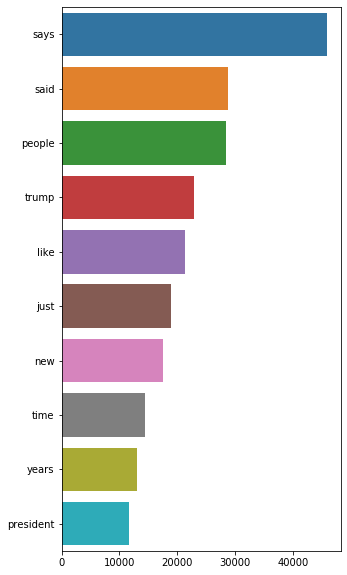

In [0]:
plt.figure(figsize = (5,10))
sns.barplot(y = df_word_freq.word.to_list()[0:10],x =  df_word_freq.freq.to_list()[0:10] )
plt.show()

# c) Top 10 keywords in each topic and wordclouds

THE TOP 10 WORDS FOR TOPIC #0
{'new': 17514, 'percent': 8021, 'government': 6477, 'company': 3869, 'million': 4505, 'care': 5594, 'people': 28454, 'health': 8560, 'said': 28866, 'says': 45968}


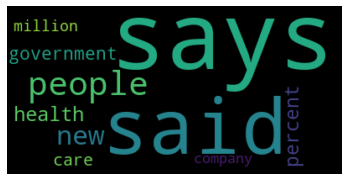



THE TOP 10 WORDS FOR TOPIC #1
{'npr': 6622, 'reports': 3796, 'says': 45968, 'news': 5073, 'people': 28454, 'told': 7266, 'police': 5032, 'president': 11581, 'trump': 22896, 'said': 28866}


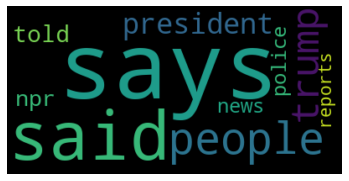



THE TOP 10 WORDS FOR TOPIC #2
{'time': 14490, 'water': 3514, 'city': 5440, 'new': 17514, 'years': 13091, 'food': 4285, 'just': 18880, 'people': 28454, 'like': 21427, 'says': 45968}


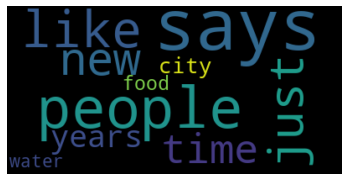



THE TOP 10 WORDS FOR TOPIC #3
{'disease': 2209, 'patients': 2346, 'just': 18880, 'children': 5166, 'study': 3640, 'like': 21427, 'women': 7718, 'health': 8560, 'people': 28454, 'says': 45968}


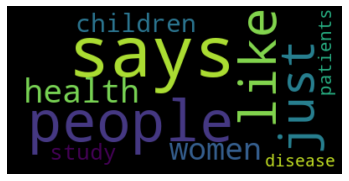



THE TOP 10 WORDS FOR TOPIC #4
{'obama': 5038, 'court': 4212, 'republican': 3717, 'campaign': 5632, 'people': 28454, 'state': 10081, 'president': 11581, 'clinton': 7377, 'said': 28866, 'trump': 22896}


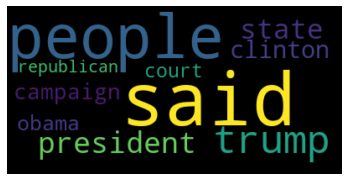



THE TOP 10 WORDS FOR TOPIC #5
{'new': 17514, 'way': 10259, 'music': 3659, 'really': 8331, 'time': 14490, 'know': 10111, 'think': 10837, 'people': 28454, 'just': 18880, 'like': 21427}


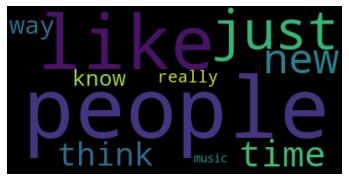



THE TOP 10 WORDS FOR TOPIC #6
{'people': 28454, 'time': 14490, 'schools': 2103, 'just': 18880, 'education': 2437, 'new': 17514, 'like': 21427, 'students': 3832, 'school': 6089, 'says': 45968}


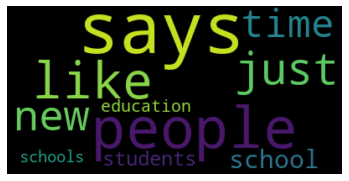

In [0]:
from wordcloud import WordCloud

wordcloud = WordCloud()



for index,topic in enumerate(LDA.components_):
    dt = {}
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    for i in topic.argsort()[-10:]:
        dt[cv.get_feature_names()[i]] = df_word_freq[df_word_freq.word ==cv.get_feature_names()[i]].freq.to_list()[0] 
    print(dt)
    wordcloud.generate_from_frequencies(frequencies=dt)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    print('\n')

# d)Apply the pyLDAVis visualization method and answer the below questions: 

In [0]:
!pip install pyLDAvis

In [0]:
# !pip3 install pyLDAvis
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [0]:
text_list = [i.split() for i in npr['Article']]
len(text_list)

11992

In [0]:
# Importing Gensim`
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(279033 unique tokens: ['(He', '(Mike', '(by', '.', '17']...)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


11992
[(11, 1), (14, 1), (18, 6), (26, 4), (51, 5), (54, 2), (56, 4), (79, 1), (110, 1), (111, 6), (112, 3), (113, 1), (114, 3), (124, 1), (131, 3), (132, 3), (135, 60), (136, 1), (137, 8), (154, 1), (158, 1), (160, 4), (161, 1), (164, 8), (165, 25), (167, 3), (171, 11), (173, 6), (175, 7), (177, 1), (179, 19), (180, 1), (188, 1), (195, 7), (196, 2), (203, 10), (208, 13), (236, 7), (261, 2), (262, 1), (271, 4), (276, 2), (289, 1), (291, 1), (303, 1), (308, 14), (313, 1), (316, 14), (324, 1), (329, 3), (330, 1), (335, 9), (340, 1), (351, 7), (352, 1), (354, 19), (365, 2), (368, 21), (371, 10), (374, 12), (379, 3), (380, 1), (388, 12), (389, 2), (393, 3), (394, 2), (395, 1), (398, 2), (401, 1), (402, 4), (403, 1), (412, 5), (414, 4), (415, 1), (424, 1), (425, 1), (426, 8), (432, 25), (436, 15), (438, 4), (439, 1), (442, 22), (443, 5), (445, 4), (446, 2), (448, 1), (452, 1), (461, 2), (484, 10), (485, 8), (487, 1), (508, 5), (512, 2), (513, 2), (516, 1), (518, 3), (534, 2), (535, 5), (537

In [0]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [0]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=7, id2word = dictionary, passes=50)

In [0]:
ldamodel.save('topic.model')


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.114941  0.002929       1        1  28.115425
4      0.104780  0.028222       2        1  20.066353
6      0.106241  0.091031       3        1  19.372562
3      0.089928  0.047128       4        1  16.227724
0      0.031063 -0.030782       5        1   9.258244
1      0.001227 -0.174300       6        1   6.372657
2     -0.448180  0.035773       7        1   0.587030, topic_info=      Category           Freq        Term          Total  loglift  logprob
565    Default  437650.000000         the  437650.000000  30.0000  30.0000
51     Default   43428.000000           I   43428.000000  29.0000  29.0000
432    Default  227600.000000          of  227600.000000  28.0000  28.0000
135    Default  214172.000000           a  214172.000000  27.0000  27.0000
165    Default  206459.000000         and  206459.000000  26.0000  26.0000
...        ...            ...         ...            ...      ...      ...
9736    Topic7      82.565948  university     273.319824   3.9408  -6.4905
7556    Topic7      73.847115        math     224.759216   4.0248  -6.6021
480     Topic7     112.181023      public    4292.542480   1.4933  -6.1840
18627   Topic7      68.656891        loan     155.837616   4.3182  -6.6750
476     Topic7      77.920799     private    1436.666626   2.2235  -6.5484

[634 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
24036      7  0.977627  (Amazon)
24039      7  0.981865  (iTunes)
1257       1  0.762912        ..
1257       2  0.018345        ..
1257       3  0.094909        ..
...      ...       ...       ...
634        6  0.085966         —
17411      1  0.997168       ’Oh
21087      1  0.982990      ”Oh,
21087      5  0.011170      ”Oh,
5345       1  0.997144    ”Yeah,

[1272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 7, 4, 1, 2, 3])